In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing DATA 

In [2]:
data=pd.read_csv("Titanic-Train-Data.csv")

First five rows of data using head()

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Number of rows and columns

In [4]:
data.shape

(891, 12)

Data Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# statistical measures about the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking null values

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Imputation on Embarked and Age columns

In [9]:
# replacing the missing values in "Age" column with mean value
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [10]:
# finding the mode value of "Cabin" column
print(data['Cabin'].mode())

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object


In [11]:
# replacing the missing values in "Cabin" column with mode value
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)


In [12]:
# replacing the missing values in "Embarked" column 
data['Embarked'].fillna(method='ffill', inplace=True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,B96 B98,Q


In [15]:
# finding the number of people survived and not survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
# Different ports of embarkation
data['Embarked'].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

# Title Etraction

In [17]:
# importing the modules
import requests
from bs4 import BeautifulSoup
 
# target url
url = 'https://learn.codingrad.com/courses/full-stack-data-science-program/lessons/data-science-projects-2/topic/eda-on-titanic-data-set/'
 
# making requests instance
reqs = requests.get(url)
 
# using the BeautifulSoup module
soup = BeautifulSoup(reqs.text, 'html.parser')
 
# displaying the title
print("Title of the website is : ")
for title in soup.find_all('title'):
    print(title.get_text())

Title of the website is : 
Full Stack Data Science Program – CodinGrad


# Ticket First letters

In [18]:
first_letter=[]
for i in range(891):
    x=[data['Ticket'][i]]
    y=x[0].split()
    first=y[0]
    first_letter.append(first)

In [19]:
df=pd.DataFrame()
df['First_letter']=first_letter
df['Given_string']=data['Ticket']

In [20]:
df.head()

,First_letter,Given_string
0,A/5,A/5 21171
1,PC,PC 17599
2,STON/O2.,STON/O2. 3101282
3,113803,113803
4,373450,373450


In [21]:
F_l=[]
s_l=[]
for i in range(0,891):
    g=df['Given_string'][i].split()
    h=len(g)
    if h==2:
        F_l.append(g[0])
    else:
        s_l.append(g[0])
          

In [22]:
F_l=pd.DataFrame(F_l)
F_l.head()

,0
0,A/5
1,PC
2,STON/O2.
3,PP
4,A/5.


# Cabin First letters

In [23]:
cabin=data['Cabin']
cf=cabin.astype(str).str[0]
df1=pd.DataFrame()
df1['cabin_first_letter']=cf

In [24]:
df1.head()


,cabin_first_letter
0,B
1,C
2,B
3,C
4,B


# Encoding sex column

In [25]:
# convert categorical data into numerical data
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()


In [26]:
df2=pd.DataFrame()
df2['sex']=data['Sex']
df2.head()

,sex
0,male
1,female
2,female
3,female
4,male


In [27]:
df2.value_counts()

sex   
male      577
female    314
dtype: int64

In [28]:
df2["sex_encode"] = ord_enc.fit_transform(df2[["sex"]])

In [29]:
df2.head()

,sex,sex_encode
0,male,1.0
1,female,0.0
2,female,0.0
3,female,0.0
4,male,1.0


# Family size

In [30]:
df3=pd.DataFrame()
df3['Name']=data['Name']
df3['Sib/Sp']=data['SibSp']
df3['Par/ch']=data['Parch']

In [31]:
df3.value_counts()

Name                                     Sib/Sp  Par/ch
Abbing, Mr. Anthony                      0       0         1
Nysveen, Mr. Johan Hansen                0       0         1
Nicholson, Mr. Arthur Ernest             0       0         1
Nicola-Yarred, Master. Elias             1       0         1
Nicola-Yarred, Miss. Jamila              1       0         1
                                                          ..
Goodwin, Miss. Lillian Amy               5       2         1
Goodwin, Mr. Charles Edward              5       2         1
Goodwin, Mrs. Frederick (Augusta Tyler)  1       6         1
Graham, Miss. Margaret Edith             0       0         1
van Melkebeke, Mr. Philemon              0       0         1
Length: 891, dtype: int64

In [32]:
family=[]
for i in range(0,891):
    d=df3['Name'][i].split()
    k=d[0]
    family.append(k)

##### family size counts using family name

In [33]:
family=pd.DataFrame(family)
family=family.value_counts().rename_axis('Family_name').reset_index(name='counts')
family.head()

,Family_name,counts
0,"Andersson,",9
1,"Sage,",7
2,"Panula,",6
3,"Carter,",6
4,"Goodwin,",6


###### family size counts using siblings/spouse and parents/childerns columns

In [34]:
total=[]
for i in range(0,891):
    tot=df3['Sib/Sp'][i]+df3['Par/ch'][i]
    total.append(tot)

In [35]:
df3['Total_size']=total

In [36]:
df3.sort_values(by='Total_size',ascending=False)
df3.tail()

,Name,Sib/Sp,Par/ch,Total_size
886,"Montvila, Rev. Juozas",0,0,0
887,"Graham, Miss. Margaret Edith",0,0,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,3
889,"Behr, Mr. Karl Howell",0,0,0
890,"Dooley, Mr. Patrick",0,0,0


# One Hot Encoding for all categorical variables

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [38]:
col_names=['Sex','Ticket','Cabin','Embarked']
for col in col_names:
    print(data[col].value_counts())

male      577
female    314
Name: Sex, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64
S    644
C    169
Q     78
Name: Embarked, dtype: int64


In [39]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Name','Sex','Ticket','Embarked'])
one_hot_encoded_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.000000,1,0,71.2833,C85,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.000000,0,0,30.0000,B42,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,B96 B98,0,0,...,0,1,0,0,0,0,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,C148,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Name','Sex','Ticket','Cabin','Embarked'])
one_hot_encoded_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data Visualization

###### Finding Null values-Heat Map

In [41]:
data1=pd.read_csv("Titanic-Train-Data.csv")

In [42]:
n=data1.isnull().sum()
nul=pd.DataFrame(n)
nul

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


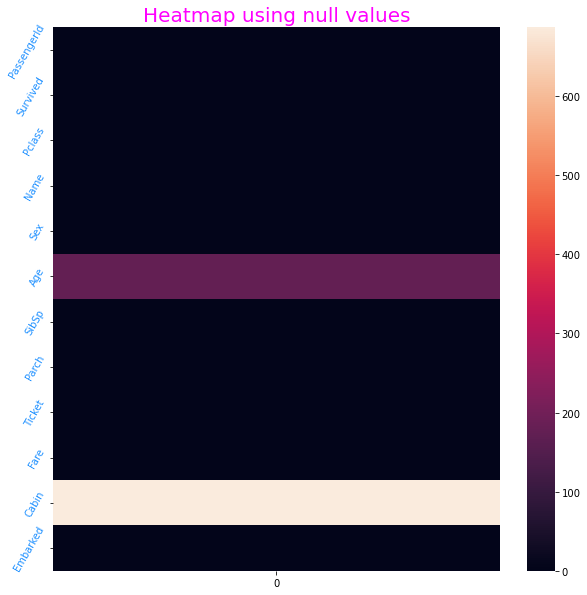

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(nul,cbar=True)
plt.title('Heatmap using null values',size=20,color='magenta')
plt.yticks(rotation=60,color='DodgerBlue')
plt.show()

# Sex vs Age using Bar graph

In [44]:
b=data[['Sex','Age']]
b.value_counts()

Sex     Age      
male    29.699118    124
female  29.699118     53
male    28.000000     18
        19.000000     18
        25.000000     18
                    ... 
female  60.000000      1
        57.000000      1
        56.000000      1
        55.000000      1
male    80.000000      1
Length: 147, dtype: int64

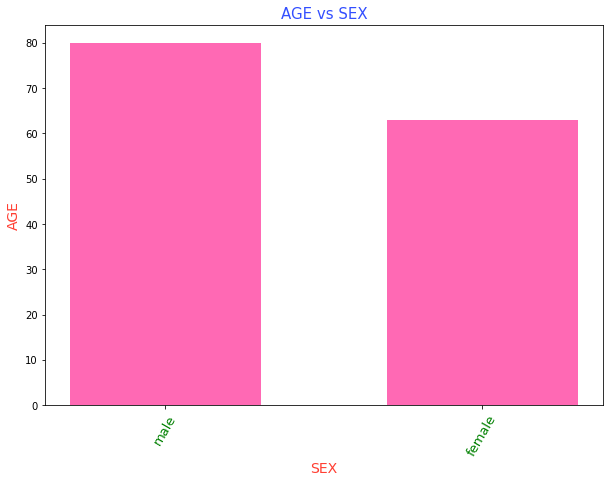

In [45]:
plt.figure(figsize=(10,7))
plt.bar(data['Sex'],data1['Age'],color='hotpink',width=0.6)
plt.xlabel('SEX',size=14,color='#FF3F33')
plt.ylabel('AGE',size=14,color='#FF3F33')
plt.xticks(rotation=60,size=13,color='green')
plt.title('AGE vs SEX',size=15,color='#334FFF')
plt.show()

### Sex vs Age vs Pclass using Bar plot

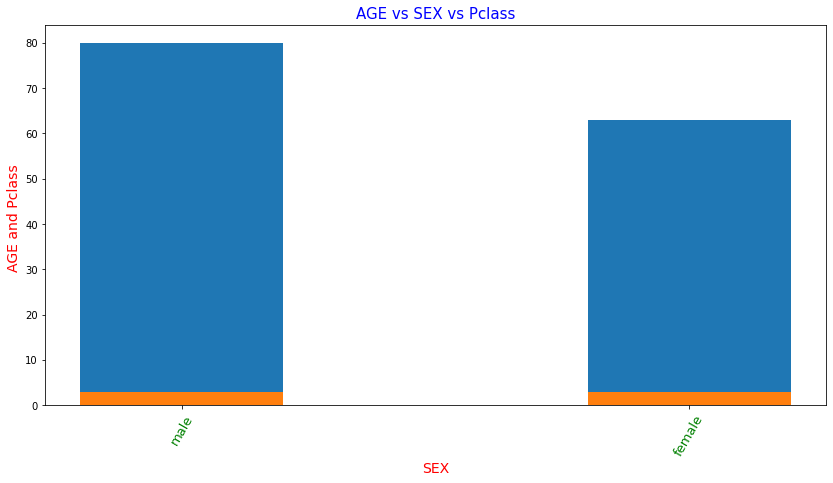

In [46]:
plt.figure(figsize=(14,7))
plt.bar(data['Sex'],data['Age'],width=0.4) 
plt.bar(data['Sex'],data['Pclass'],width=0.4) 
plt.xlabel('SEX',size=14,color='red')
plt.ylabel('AGE and Pclass ',size=14,color='red')
plt.xticks(rotation=60,size=13,color='green')
plt.title('AGE vs SEX vs Pclass',size=15,color='blue')
plt.show()

# Sex vs Age vs Pclass using Violin plot

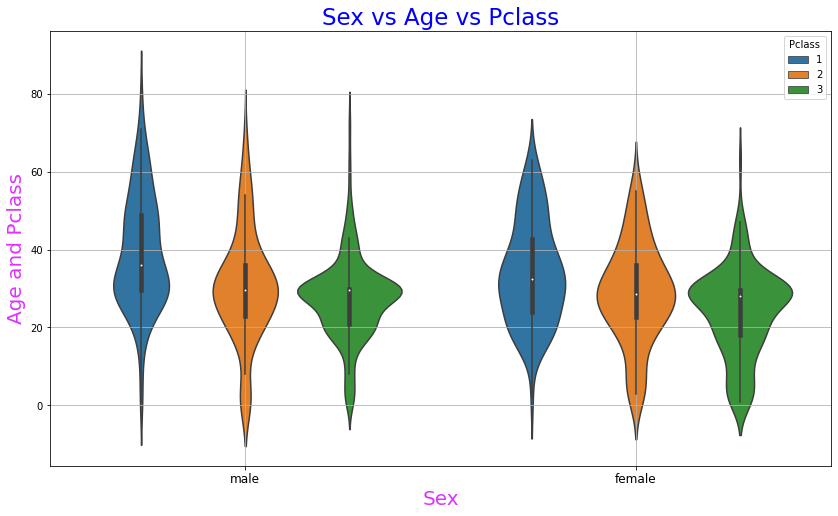

In [47]:
plt.figure(figsize=(14,8))
sns.violinplot(data['Sex'],data['Age'],data['Pclass'])
plt.title('Sex vs Age vs Pclass',size=23,color='blue')
plt.ylabel('Age and Pclass',size=20,color='#DD33FF')
plt.xlabel('Sex',size=20,color='#DD33FF')
plt.xticks(size=12)
plt.grid()
plt.show()

# Classifying age using Dist plot

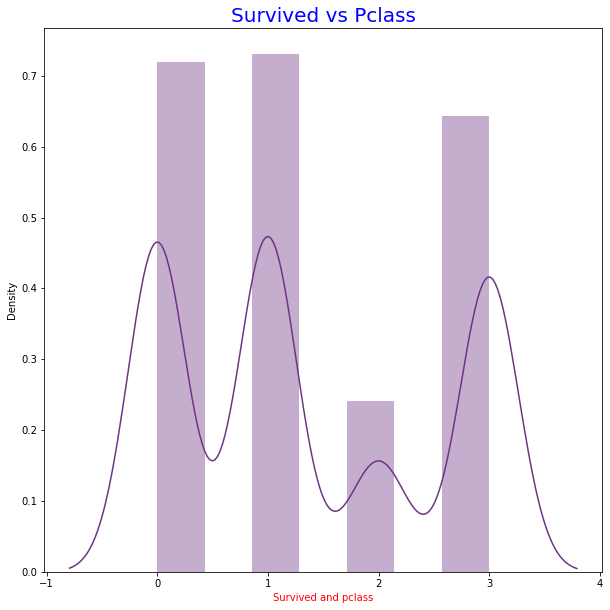

In [48]:
plt.figure(figsize=(10,10))
sns.distplot(data[['Survived','Pclass']],color='#6C3483')
plt.title('Survived vs Pclass',size=20,color='blue')
plt.xlabel('Survived and pclass',color='red')
plt.show()

###### Classifying age using Dist plot: Sex vs Age vs Pclass using Bar plot

In [49]:
dis=data[['Age','Pclass','Survived']]

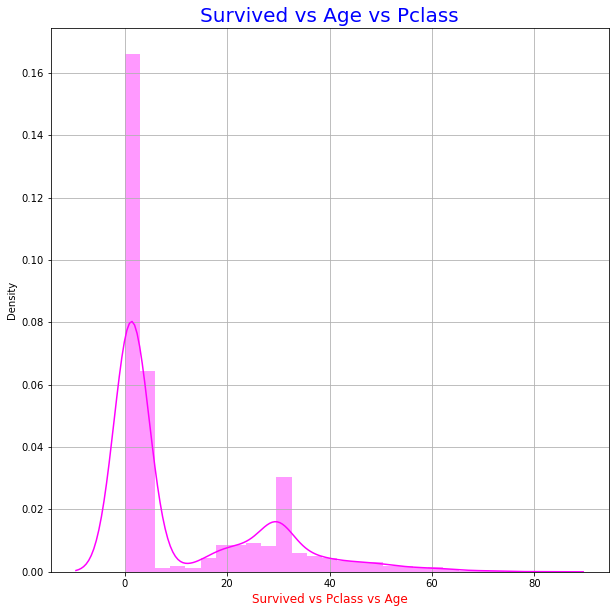

In [50]:
plt.figure(figsize=(10,10))
sns.distplot(dis,color='magenta')
plt.title('Survived vs Age vs Pclass',size=20,color='blue')
plt.xlabel('Survived vs Pclass vs Age',size=12,color='red')
plt.grid()
plt.show()